# Gait Monitoring for Parkinson's Disease Patients
**Mentor**: Arthur Tay

## Project Description
The objective of this project is to monitor the gait patterns for people with Parkinson Disease. We will analyse the gait for PD patients during freezing and non-freezing (normal) events. Various parameters (e.g. cadence, step lengths, stride lengths, etc) related to gait will be derived from motion sensors (accelerometers, gyroscopes, magnetometers) using public datasets of PD patients. We will then investigate which of these parameters is most suitable for classification for freezing of gait in PD patients.

## Final Product
To make use of signal processing algorithms in extracting gait parameters from motion sensors and identifying most suitable parameters for classification of freezing of gait in PD patients.

## Methodology
Students will first need to review and understands how to extract gait parameters from motion sensors. There are different algorithms in the literature and they will need to investigate which is most suitable. They will then make use of a PD patient public dataset to test out their methods. If time permits, they will learn basic machine learning tools for classification.

## Dataset
[link](https://www.physionet.org/content/gaitdb/1.0.0/)

### Data Description

Walking stride interval time series included are from 15 subjects: 5 healthy young adults (23 - 29 years old), 5 healthy old adults (71 - 77 years old), and 5 older adults (60 - 77 years old) with Parkinson's disease. The file name indicates old (o), young (y) or Parkinson's disease (pd). For the old and young subjects, the age (in years) is also included in the filename.



Subjects walked continuously on level ground around an obstacle-free path. The stride interval was measured using ultra-thin, force sensitive resistors placed inside the shoe. The analog force signal was sampled at 300 Hz with a 12 bit A/D converter, using an ambulatory, ankle-worn microcomputer that also recorded the data. Subsequently, the time between foot-strikes was automatically computed. The method for determining the stride interval is a modification of a previously validated method that has been shown to agree with force-platform measures, a “gold” standard.



Data were collected from the healthy subjects as they walked in a roughly circular path for 15 minutes, and from the subjects with Parkinson’s disease as they walked for 6 minutes up and down a long hallway.

### Imports

In [4]:
# imports
!pip install matplotlib

import numpy as np # main library for numeric calculations
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data plotting
import seaborn as sns
sns.set() # mainly to set style of the plot
from glob import glob # check files
from math import *

"""
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

import warnings
warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter

%matplotlib inline
# to place plotting inside the diagram

You should consider upgrading via the 'c:\users\prannaya\anaconda3\python.exe -m pip install --upgrade pip' command.


### Get Data

In [6]:
data = []
names = []
for i in sorted(glob("*.txt")):
  names.append(i)
  data.append(pd.read_csv(i, sep="\t", names=["time", "stride_time"]))

data[0]

,time,stride_time
0,30.797,1.023
1,31.820,1.030
2,32.850,1.017
3,33.867,1.027
4,34.893,1.043
...,...,...
810,865.780,0.997
811,866.777,0.993
812,867.770,1.007
813,868.777,1.013


### Plotting Initial Graphs

o1.txt
o2.txt
o3.txt
o4.txt
o5.txt
pd1.txt
pd2.txt
pd3.txt
pd4.txt
pd5.txt
y1.txt
y2.txt
y3.txt
y4.txt
y5.txt


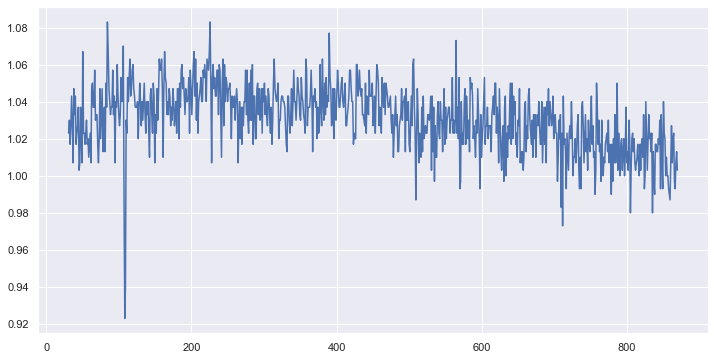

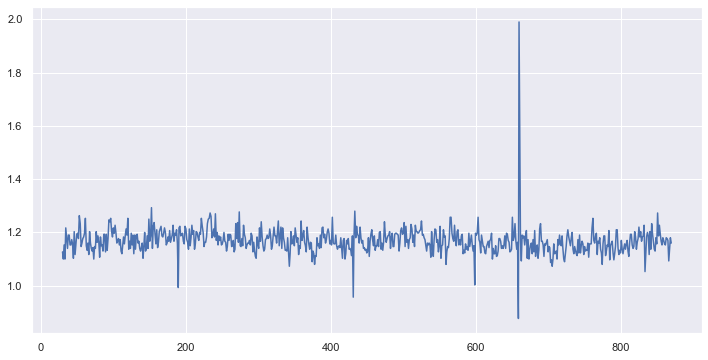

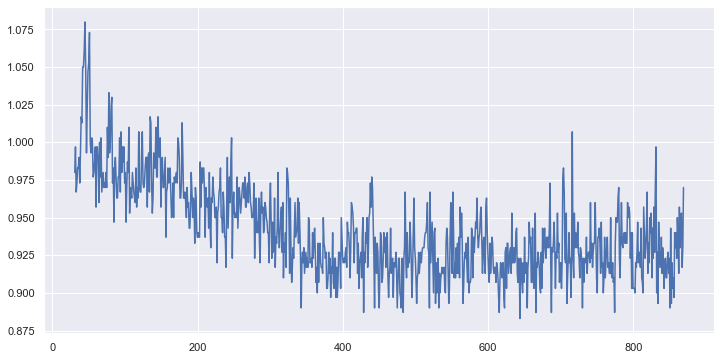

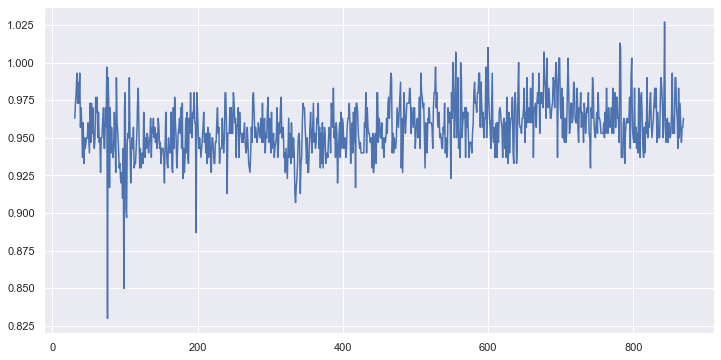

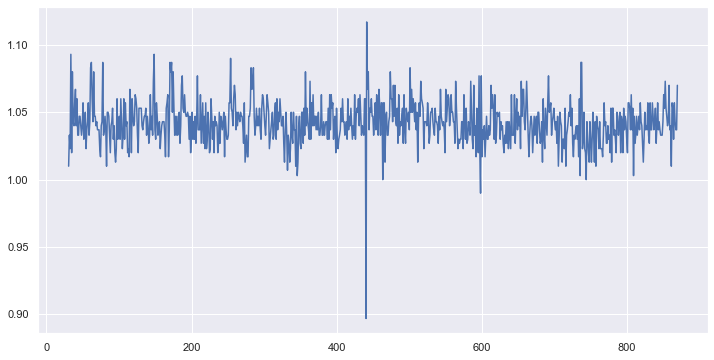

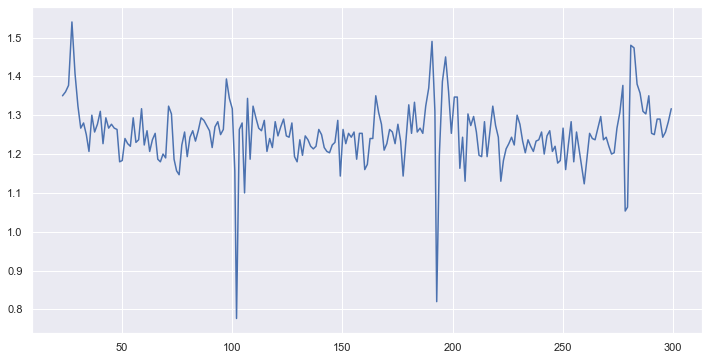

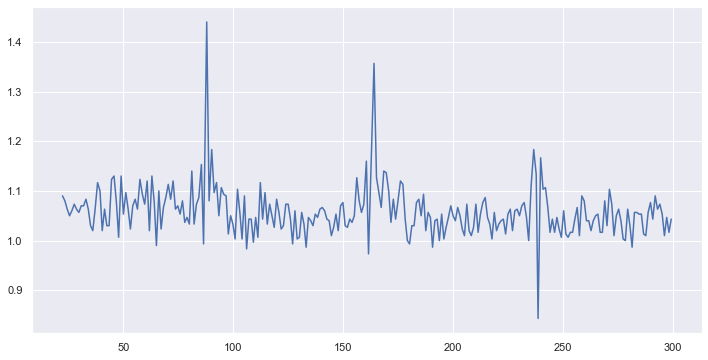

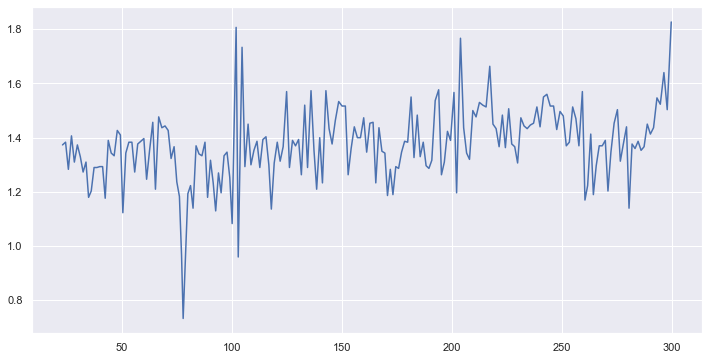

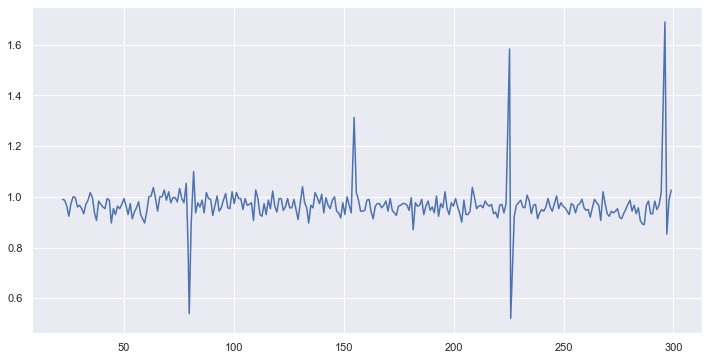

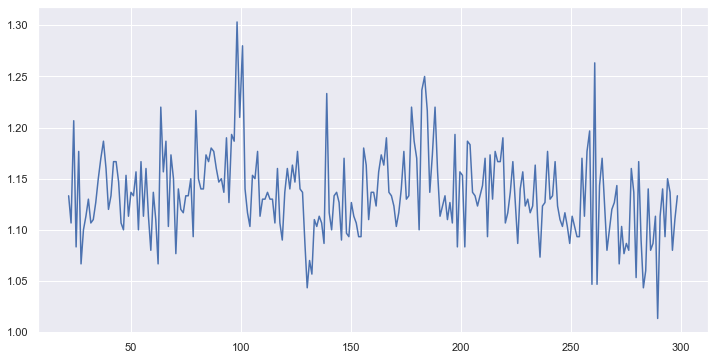

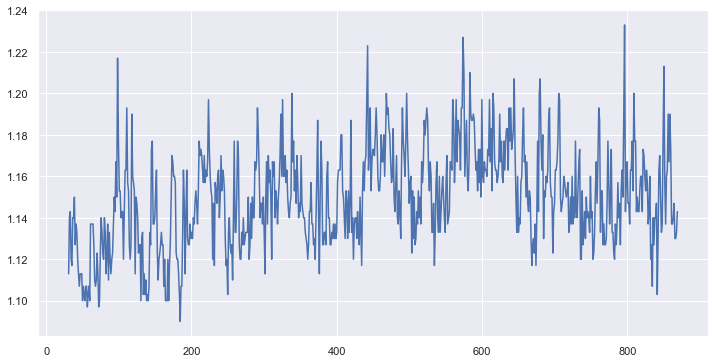

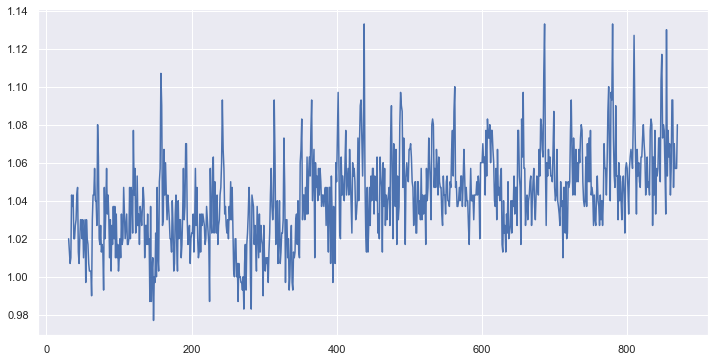

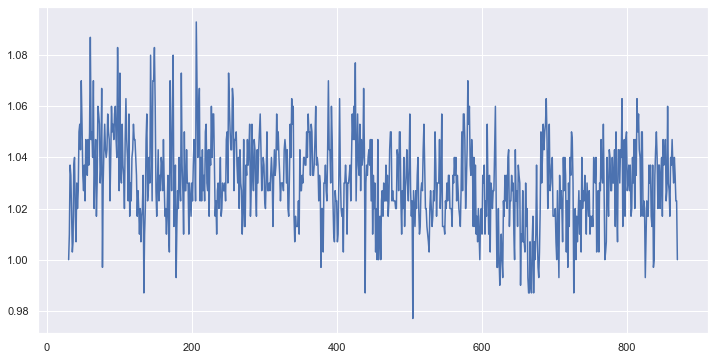

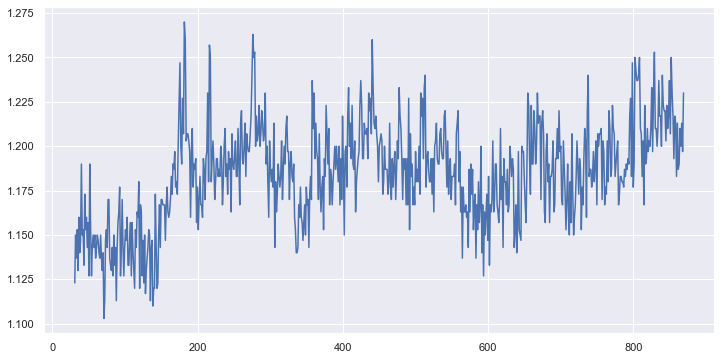

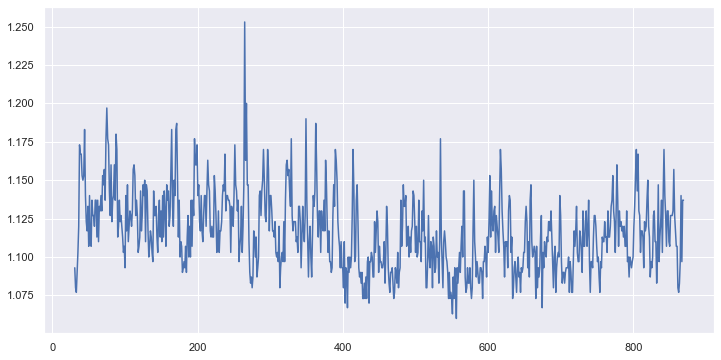

In [7]:
for i in range(len(data)):
  plt.figure(figsize=(12, 6))
  print(names[i])
  plt.plot(data[i]["time"], data[i]["stride_time"])

### Variances

In [11]:
variances = []
for i in range(15):
    var = data[i].var()["stride_time"]
    print(names[i], var)
    variances.append(var)

o1.txt 0.0003150203102154013
o2.txt 0.0025416611883789233
o3.txt 0.0009108964281580096
o4.txt 0.00033811834137756824
o5.txt 0.0002692188292773129
pd1.txt 0.006372048896702135
pd2.txt 0.00254124891039967
pd3.txt 0.0197283147651563
pd4.txt 0.006288075749128922
pd5.txt 0.0017474187480762782
y1.txt 0.0005700363342540924
y2.txt 0.0005673018078695489
y3.txt 0.0002956847106940924
y4.txt 0.0007965643741085166
y5.txt 0.0006283753293481047


### Logistic Regression Data Preparation

In [15]:
X = np.array([[1]*15, variances])
Y = np.array([0]*5 + [1]*5 + [0]*5)[np.newaxis].T
theta = np.array([0, 1])
m = 15

### Logistic Regression Functions

In [26]:
def sigmoid(z):
    return 1/(1 + np.exp(-z));

def logReg(iterations=50):
    global theta
    alpha = 10
    J = float("inf")
    for i in range(iterations):
        h = sigmoid(theta @ X)[np.newaxis].T
        J_temp = (-Y.T @ np.log(h)) - ((1 - Y).T @ np.log(1 - h))
        if isnan(J_temp) or isinf(J_temp): break
        elif J_temp > J: print(J_temp)
        J = J_temp
        theta = theta - alpha/m * (X @ (h - Y)).T[0]
    print(theta)

### Logistic Regression Brute Force

In [21]:
logReg(1000000)

[[10.91765797]]
[[11.23106615]]
[[11.36949937]]
[[11.41301305]]
[[11.4243817]]
[[11.42684273]]
[[11.42698776]]
[[11.426541]]
[[11.42594367]]
[[11.42530808]]
[[11.42466274]]
[[11.4240149]]
[[11.42336642]]
[[11.42271775]]
[[11.42206901]]
[[11.42142024]]
[[11.42077144]]
[[11.42012261]]
[[11.41947376]]
[[11.41882488]]
[[11.41817598]]
[[11.41752705]]
[[11.41687809]]
[[11.41622911]]
[[11.41558011]]
[[11.41493107]]
[[11.41428201]]
[[11.41363293]]
[[11.41298382]]
[[11.41233468]]
[[11.41168552]]
[[11.41103633]]
[[11.41038711]]
[[11.40973787]]
[[11.40908861]]
[[11.40843931]]
[[11.40778999]]
[[11.40714065]]
[[11.40649128]]
[[11.40584188]]
[[11.40519246]]
[[11.40454301]]
[[11.40389353]]
[[11.40324403]]
[[11.4025945]]
[[11.40194494]]
[[11.40129536]]
[[11.40064575]]
[[11.39999612]]
[[11.39934646]]
[[11.39869677]]
[[11.39804706]]
[[11.39739732]]
[[11.39674755]]
[[11.39609776]]
[[11.39544794]]
[[11.39479809]]
[[11.39414822]]
[[11.39349832]]
[[11.39284839]]
[[11.39219844]]
[[11.39154846]]
[[11.39089845

In [38]:
logReg(50000000)

[  -4.50241442 2090.35672887]


In [25]:
bool(np.array([[7.2433708]]) > float("inf"))

False

### Testing Validity

In [29]:
theta0, theta1 = tuple(theta)
for i in range(15):
  print(names[i], sigmoid(theta0 + theta1*variances[i]))

o1.txt 0.020960965456681777
o2.txt 0.6922297080275551
o3.txt 0.06924688221484637
o4.txt 0.021975071354770264
o5.txt 0.019083728829316665
pd1.txt 0.9998518949865342
pd2.txt 0.6920460713603303
pd3.txt 1.0
pd4.txt 0.999823481270244
pd5.txt 0.2994987554473062
y1.txt 0.03520134528144031
y2.txt 0.03500772762026932
y3.txt 0.020147380465463514
y4.txt 0.05534096091562478
y5.txt 0.03958611787942368
